# Image Classifier Project
** Data download process in file named 'download_process.ipynb'

## Problem Statement

The dataset is composed of dog and cat photos provided as a subset of photos from a much larger 3 million manually annotated photos. This data was obtained through a collaboration between Petfinder.com and Microsoft.

The data set was originally used as a CAPTCHA, i.e., a task that a human is believed to find trivial, but that a machine cannot solve, which is used on websites to distinguish between human users and bots. The task was named "Asirra". When "Asirra" was introduced, it was mentioned "that user studies indicate that humans can solve it 99.6% of the time in less than 30 seconds." Barring a breakthrough in computer vision, we expect that computers will have no more than a 1/54,000 chance of solving it.

At the time the competition was published, the state-of-the-art result was achieved with an SVM and was described in a 2007 paper with the title "Machine Learning Attacks against Asirra's CAPTCHA" (PDF) that achieved 80% classification accuracy. It was this paper that showed that the task was no longer a suitable task for a CAPTCHA shortly after the task was proposed.

## Visualize the input

### Cats
<img src="../data/raw/train/train/cat.0.jpg"> <img src="../data/raw/train/train/cat.1.jpg"> <img src="../data/raw/train/train/cat.2.jpg">
<img src="../data/raw/train/train/cat.3.jpg"> <img src="../data/raw/train/train/cat.4.jpg"> <img src="../data/raw/train/train/cat.5.jpg">
<img src="../data/raw/train/train/cat.6.jpg"> <img src="../data/raw/train/train/cat.7.jpg"> <img src="../data/raw/train/train/cat.8.jpg">

### Dogs
<img src="../data/raw/train/train/dog.0.jpg"> <img src="../data/raw/train/train/dog.1.jpg"> <img src="../data/raw/train/train/dog.2.jpg">
<img src="../data/raw/train/train/dog.3.jpg"> <img src="../data/raw/train/train/dog.4.jpg"> <img src="../data/raw/train/train/dog.5.jpg">
<img src="../data/raw/train/train/dog.6.jpg"> <img src="../data/raw/train/train/dog.7.jpg"> <img src="../data/raw/train/train/dog.8.jpg">

In [1]:
import os,shutil,pathlib
original_dir = pathlib.Path("../data/raw/train/train")
new_base_dir = pathlib.Path("../data/raw/reduced_ds/")

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    f_names = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for f_name in f_names:
      shutil.copyfile(src=original_dir / f_name, dst=dir / f_name)

In [2]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

FileExistsError: [Errno 17] File exists: '../data/raw/reduced_ds/train/cat'

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

2023-11-16 05:55:03.594560: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 05:55:05.909593: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 05:55:05.909686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 05:55:06.278642: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 05:55:06.996576: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 05:55:06.998546: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [6]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

In [8]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
  print(f"Data batch shape: {data_batch.shape}")
  print(f"Labels batch shape: {labels_batch.shape}")
  break

Data batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.x",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [11]:
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30


2023-11-16 05:55:19.124885: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 129777664 exceeds 10% of free system memory.
2023-11-16 05:55:19.643895: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 32444416 exceeds 10% of free system memory.
2023-11-16 05:55:19.668719: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 62005248 exceeds 10% of free system memory.
2023-11-16 05:55:19.800984: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15147008 exceeds 10% of free system memory.
2023-11-16 05:55:19.810746: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27541504 exceeds 10% of free system memory.


63/63 [==============================] - ETA: 0s - loss: 0.6956 - accuracy: 0.5185INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 104s 2s/step - loss: 0.6956 - accuracy: 0.5185 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5330INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 99s 2s/step - loss: 0.6935 - accuracy: 0.5330 - val_loss: 0.6815 - val_accuracy: 0.5580
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.5915INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 98s 2s/step - loss: 0.6791 - accuracy: 0.5915 - val_loss: 0.6747 - val_accuracy: 0.6150
Epoch 4/30
63/63 [==============================] - ETA: 0s - loss: 0.6721 - accuracy: 0.6305INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 99s 2s/step - loss: 0.6721 - accuracy: 0.6305 - val_loss: 0.6138 - val_accuracy: 0.6640
Epoch 5/30
63/63 [==============================] - 97s 2s/step - loss: 0.6135 - accuracy: 0.6575 - val_loss: 0.6374 - val_accuracy: 0.6330
Epoch 6/30
63/63 [==============================] - ETA: 0s - loss: 0.5744 - accuracy: 0.6970INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 98s 2s/step - loss: 0.5744 - accuracy: 0.6970 - val_loss: 0.5758 - val_accuracy: 0.6860
Epoch 7/30
63/63 [==============================] - 97s 2s/step - loss: 0.5484 - accuracy: 0.7210 - val_loss: 0.6089 - val_accuracy: 0.6780
Epoch 8/30
63/63 [==============================] - 102s 2s/step - loss: 0.5135 - accuracy: 0.7440 - val_loss: 0.5904 - val_accuracy: 0.7020
Epoch 9/30
63/63 [==============================] - ETA: 0s - loss: 0.4824 - accuracy: 0.7530INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 99s 2s/step - loss: 0.4824 - accuracy: 0.7530 - val_loss: 0.5753 - val_accuracy: 0.6980
Epoch 10/30
63/63 [==============================] - ETA: 0s - loss: 0.4356 - accuracy: 0.7965INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.x/assets


63/63 [==============================] - 97s 2s/step - loss: 0.4356 - accuracy: 0.7965 - val_loss: 0.5619 - val_accuracy: 0.7380
Epoch 11/30
63/63 [==============================] - 97s 2s/step - loss: 0.3949 - accuracy: 0.8155 - val_loss: 0.6160 - val_accuracy: 0.6980
Epoch 12/30
63/63 [==============================] - 97s 2s/step - loss: 0.3442 - accuracy: 0.8440 - val_loss: 0.6670 - val_accuracy: 0.7060
Epoch 13/30
63/63 [==============================] - 98s 2s/step - loss: 0.3079 - accuracy: 0.8675 - val_loss: 0.6671 - val_accuracy: 0.7180
Epoch 14/30
63/63 [==============================] - 98s 2s/step - loss: 0.2522 - accuracy: 0.9000 - val_loss: 0.8274 - val_accuracy: 0.6840
Epoch 15/30
63/63 [==============================] - 98s 2s/step - loss: 0.1904 - accuracy: 0.9265 - val_loss: 1.5282 - val_accuracy: 0.6810
Epoch 16/30
63/63 [==============================] - 98s 2s/step - loss: 0.1693 - accuracy: 0.9355 - val_loss: 1.1503 - val_accuracy: 0.6640
Epoch 17/30
63/63 [======

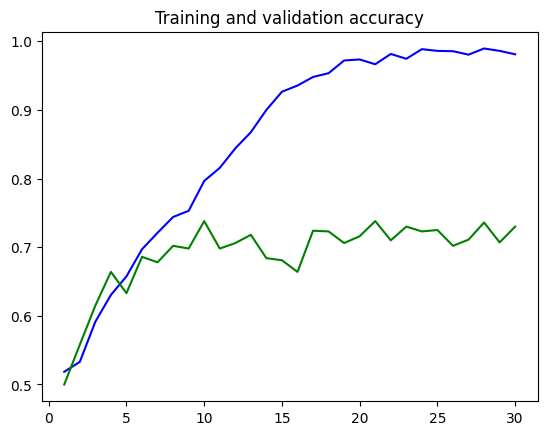

In [12]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, 31)
plt.plot(epochs, accuracy, "b", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "g", label="Validation Accuracy")
plt.title(label="Training and validation accuracy")
plt.show()